# Simple countdown animation in Python

Let's create a simple countdown animation in Python [1][2]. To achieve this, we'll generate a sequence of consecutive frames. The countdown will last 3 seconds, displaying the sequence 3-2-1-0. Each number will grow in size as it appears and shrink before transitioning to the next number.

First, we'll define the dimensions of a single static blank frame and visualize the result.

In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# define the dimensions of the animation frame
WIDTH = 300   # frame width in pixels
HEIGHT = 300  # frame height in pixels

# define display and animation properties
DPI = 100     # resolution - pixels per inch
FPS = 60      # frames per second, for smooth animation

# define countdown properties
DURATION = 3   # countdown duration in seconds (3-2-1-0)
MAX_FONT_SIZE = 150  # maximum font size for the numbers

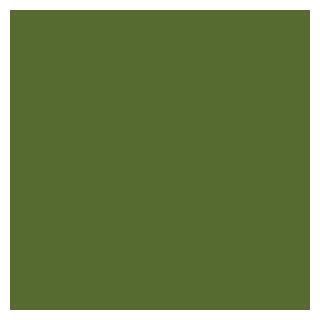

In [3]:
# create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(WIDTH/DPI, HEIGHT/DPI), dpi=DPI)

# add an empty plot (placeholder)
ax.plot()

# set the frame dimensions and background color
ax.set_xlim(0, WIDTH)   # set the x-axis range to match the frame width
ax.set_ylim(0, HEIGHT)  # set the y-axis range to match the frame height
ax.set_facecolor("darkolivegreen")  # set the background color of the frame [3]

# hide the axes (no ticks or labels) [4]
ax.get_xaxis().set_visible(False)  # hide the x-axis
ax.get_yaxis().set_visible(False)  # hide the y-axis

# hide plot borders (remove the frame surrounding the plot) [5]
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# remove figure margins to ensure the plot fills the frame completely [6]
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)

# display the empty frame
plt.show()

We now have a single frame displayed. Note: Ignore the white margins — if you save the frame to disk, they won’t appear.

The next step is to draw the countdown number in the center of the frame. The origin point (0,0) is located in the bottom-left corner.

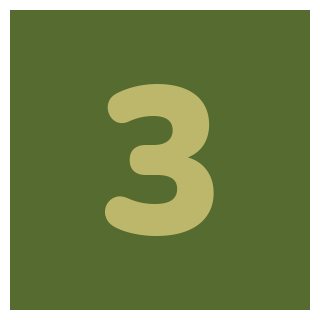

In [4]:
# add a countdown number in the center of the frame
text = ax.text(
    0.50 * WIDTH,       # x-coordinate, slightly off-center for balance
    0.44 * HEIGHT,      # y-coordinate, slightly off-center for balance
    DURATION,           # text content (initial countdown number, e.g., 3)
    ha="center",        # horizontal alignment of the text
    va="center",        # vertical alignment of the text
    fontsize=MAX_FONT_SIZE,  # font size
    weight='bold',      # font weight (bold for emphasis)
    color="darkkhaki",  # text color [3]
    family="Nunito",    # font family for styling [7]
)

# return the figure object (useful for visualization)
fig

Ensure the font *Nunito* [7] is available in your environment. If not, you may need to install it or replace it with a default font. The slight offsets (0.50 and 0.44) are good for centering while accounting for font metrics.

Next, we need to determine how to change the value (Eq. 1) and size (Eq. 2) of the numbers during the countdown. We will use the absolute value of the cosine function. From the graph below, you can see how the font size will gradually increase and decrease throughout the countdown.

$$
\begin{equation}\tag{1}
\text{number-to-display} = \left\lfloor \text{countdown-time} + \frac{1}{2} \right\rfloor 
\end{equation}
$$

$$
\begin{equation}\tag{2}
\text{font-size} = \verb|MAX_FONT_SIZE| \cdot \left|\cos{(\text{countdown-time} \cdot \pi)}\right|
\end{equation}
$$

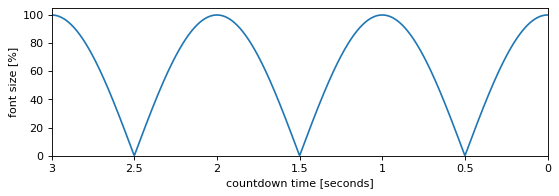

Finally, we’ll move on to creating the animation itself.

In [5]:
# create a new figure and axis for the animation
fig, ax = plt.subplots(figsize=(WIDTH/DPI, HEIGHT/DPI), dpi=DPI)

# create the text object that will display the countdown number
text = ax.text(
    0.50 * WIDTH,            # x-coordinate, slightly off-center for balance
    0.44 * HEIGHT,           # y-coordinate, slightly off-center for balance
    DURATION,                # initial countdown number (e.g. 3)
    ha="center",             # horizontal alignment of text
    va="center",             # vertical alignment of text
    fontsize=MAX_FONT_SIZE,  # starting font size
    weight='bold',           # bold font weight
    color="darkkhaki",       # text color [3]
    family="Nunito",         # font family for styling [7]
)

# initialization function to set up the static background and other properties
def init():
    # set frame dimensions and background color
    ax.set_xlim(0, WIDTH)   # set the width of the frame
    ax.set_ylim(0, HEIGHT)  # set the height of the frame
    ax.set_facecolor("darkolivegreen")  # background color [3]

    # hide the axes (no ticks or labels) [4]
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # hide plot borders (remove the frame surrounding the plot) [5]
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # remove margins from the figure to ensure the plot fills the screen [6]
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
    return text,

# animate function to update the countdown number and font size
def animate(t):
    text.set_text(int(t + 0.5))  # set the new number to display, Eq. (2)
    text.set_fontsize(MAX_FONT_SIZE * np.abs(np.cos(t * np.pi)))  # set the new font size, Eq. (1)
    return text,

# set up the animation with FuncAnimation
ani = animation.FuncAnimation(
    fig=fig,              # figure to animate
    func=animate,         # animation function
    init_func=init,       # initialization function
    frames=np.linspace(DURATION, 0, DURATION * FPS),  # number of frames is based on duration and FPS
    interval=1000 / FPS,  # delay between frames (1000/60 = 16.67 milliseconds)
    blit=True,            # only update the parts of the figure that have changed (for efficiency)
)

# save the animation as a video file (MP4) and a GIF [8]
ani.save("assets/01-countdown-animation-Matplotlib.mp4", writer=animation.FFMpegWriter(fps=FPS, bitrate=5000))
ani.save("assets/01-countdown-animation-Matplotlib.gif", writer=animation.FFMpegWriter(fps=50, bitrate=5000))

# close the figure to prevent it from displaying in the notebook
plt.close(fig)

And this is the final animation.

![](assets/01-countdown-animation-Matplotlib.gif)

## References
1. [Animations using Matplotlib](https://matplotlib.org/stable/users/explain/animations/animations.html) - official Matplotlib documentation
2. [`matplotlib.animation` API Reference](https://matplotlib.org/stable/api/animation_api.html) - Matplotlib API reference for animations
3. [List of Named Colors](https://matplotlib.org/stable/gallery/color/named_colors.html) - a comprehensive list of named colors in Matplotlib
4. [Hiding Axis Text in Matplotlib Plots](https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots)
5. [How to Remove Frame from a Figure](https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-a-figure)
6. [Adjust Figure Margin](https://stackoverflow.com/questions/18619880/adjust-figure-margin)
7. [Nunito Google Font](https://fonts.google.com/specimen/Nunito) - free Nunito font on Google Fonts
8. [Matplotlib Animation Movie: Quality of Movie Decreasing with Time](https://stackoverflow.com/questions/25203311/matplotlib-animation-movie-quality-of-movie-decreasing-with-time)
9. [ChatGPT-4o](https://chat.openai.com/chat) - assistance with proofreading the text and code